In [1]:
import numpy as np
import keras
import keras.backend as K

classifier_name = ['A', 'B', 'C']

for target in [0, 5]:
    rec = np.load('../APEGAN/reconstruct_2/test_%d.npy' % target)
    adv = np.load('../AdvGAN/samples/WB-B-t%d-adv.npy' % target)[-10000:]
    label = np.load('../AdvGAN/samples/WB-B-t%d-label.npy' % target)[-10000:]
    num = label.shape[0]
    for cn in classifier_name:
        F = keras.models.load_model('../AdvGAN/models/Classifier-' + cn + '.h5')
        pdt_adv = np.argmax(F.predict(adv[:num,]), axis=1)
        pdt_rec = np.argmax(F.predict(rec[:num,]), axis=1)
        adv_acc = np.sum(pdt_adv==label[:num,])/num
        rec_acc = np.sum(pdt_rec==label[:num,])/num
        print('{}, {} : adv acc:{:.4f}, rec acc:{:.4f}'.format(target, cn, adv_acc, rec_acc))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


0, A : adv acc:0.0763, rec acc:0.0210
0, B : adv acc:0.0000, rec acc:0.0000
0, C : adv acc:0.1075, rec acc:0.0370
5, A : adv acc:0.1179, rec acc:0.0274
5, B : adv acc:0.0000, rec acc:0.0000
5, C : adv acc:0.0002, rec acc:0.0002


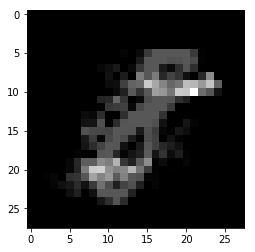

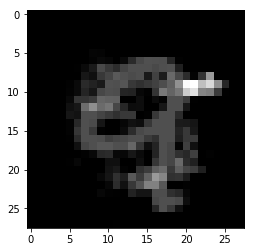

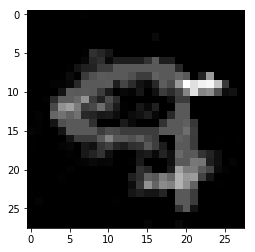

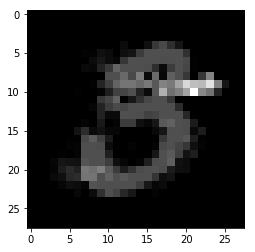

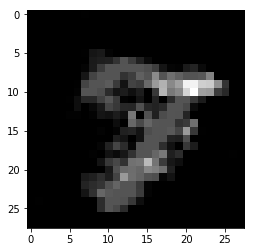

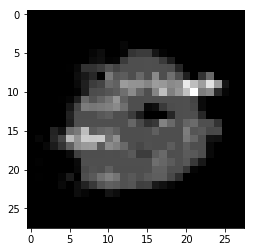

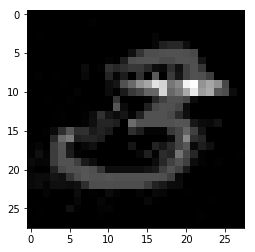

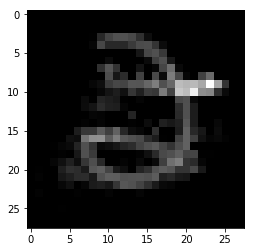

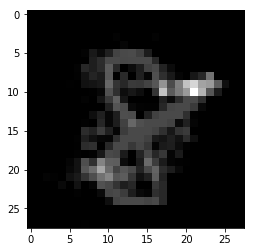

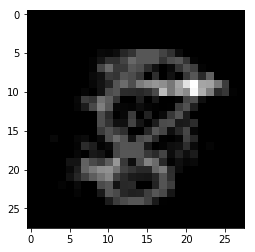

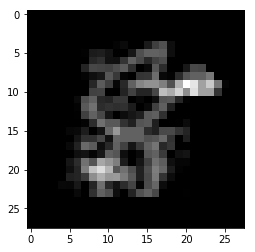

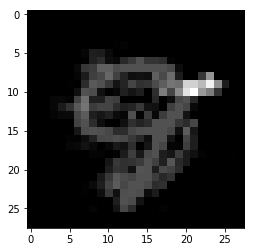

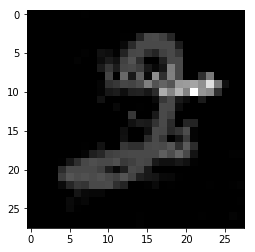

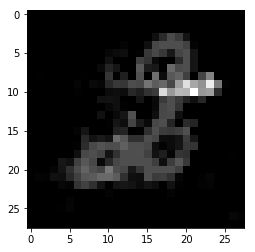

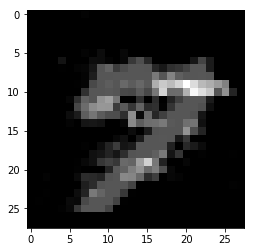

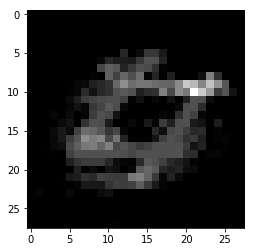

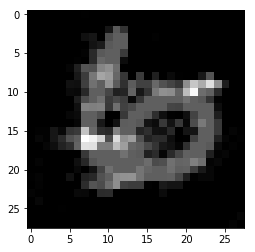

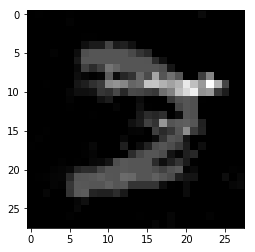

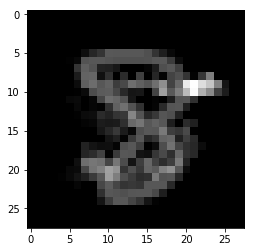

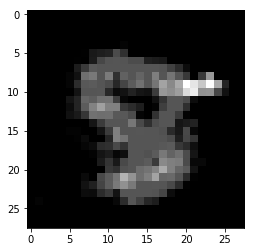

In [3]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(rec[i,].reshape(28,28), cmap='gray')
    plt.show()
    plt.imshow(adv[i,].reshape(28,28), cmap='gray')
    plt.show()